1. Build a predictive linear regression model for given dataset, train the model for
training set and test it against test dataset, plot the model using any plotting
library.


### import library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

### import dataset

In [2]:
train_ds=pd.read_csv("train.csv")
test_ds=pd.read_csv("test.csv")

In [3]:
train_ds.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [4]:
train_ds.describe()

,x,y
count,700.000000,699.000000
mean,54.985939,49.939869
std,134.681703,29.109217
min,0.000000,-3.839981
25%,25.000000,24.929968
50%,49.000000,48.973020
75%,75.000000,74.929911
max,3530.157369,108.871618


In [5]:
train_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       700 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 11.1 KB


In [6]:
test_ds.shape

(300, 2)

In [7]:
train_ds.shape

(700, 2)

### A. Handling missing data

D:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='y', ylabel='Density'>

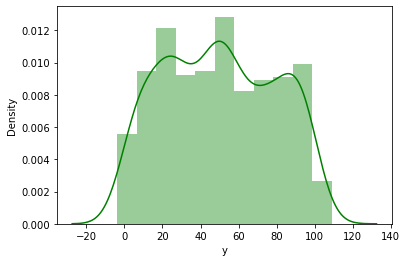

In [8]:
sns.distplot(train_ds['y'],color='green')

In [9]:
train_ds.isna().sum()

x    0
y    1
dtype: int64

In [10]:
train_ds['y'].fillna(train_ds['y'].mean(),inplace=True)

In [11]:
train_ds.isna().sum()

x    0
y    0
dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x29ccc42c820>,
 'caps': [<matplotlib.lines.Line2D at 0x29ccc42cca0>,
 'boxes': [<matplotlib.lines.Line2D at 0x29ccc42c550>,
 'medians': [<matplotlib.lines.Line2D at 0x29ccc43c280>,
 'fliers': [<matplotlib.lines.Line2D at 0x29ccc43c580>,
 'means': []}

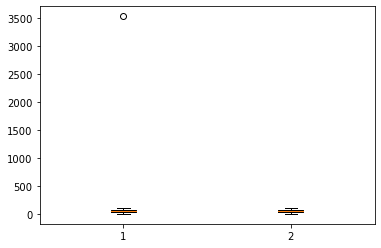

In [12]:
plt.boxplot(train_ds)

In [13]:
quantile1,quantile3=np.percentile(train_ds,[25,75])
quantile1,quantile3

(25.0, 75.0)

In [14]:
iqr=quantile3-quantile1
print(iqr)

50.0


In [15]:
lower_bound=quantile1-(1.5*iqr)
upper_bound=quantile3+(1.5*iqr)

In [16]:
lower_bound

-50.0

In [17]:
upper_bound

150.0

In [18]:
train_ds[train_ds['x']>upper_bound]

,x,y
213,3530.157369,49.939869


In [19]:
train_ds=train_ds[(train_ds.x<upper_bound) & (train_ds.x>lower_bound)]

In [20]:
train_ds.describe()

,x,y
count,699.000000,699.000000
mean,50.014306,49.939869
std,28.954560,29.109217
min,0.000000,-3.839981
25%,25.000000,24.929968
50%,49.000000,48.973020
75%,75.000000,74.929911
max,100.000000,108.871618


D:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='y', ylabel='Density'>

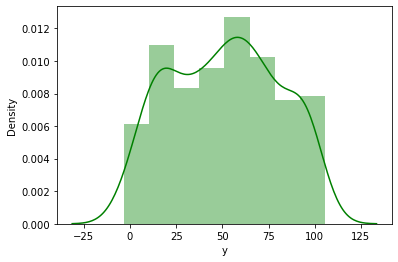

In [21]:
sns.distplot(test_ds['y'],color='green')

In [22]:
test_ds.isna().sum()

x    0
y    0
dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x29ccc538ac0>,
 'caps': [<matplotlib.lines.Line2D at 0x29ccc5490a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x29ccc5387f0>,
 'medians': [<matplotlib.lines.Line2D at 0x29ccc549670>,
 'fliers': [<matplotlib.lines.Line2D at 0x29ccc549940>,
 'means': []}

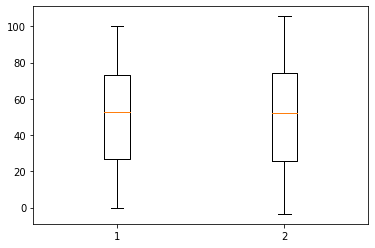

In [23]:
plt.boxplot(test_ds)

## feature scalling

In [24]:
def standardScalling(x):
    x_mean=np.mean(x,axis=0)
    x_std=np.std(x,axis=0)
    x_scale=(x-x_mean)/x_std
    return x_scale.astype('float')

In [25]:
for i in range(len(train_ds.columns)):
    train_ds.iloc[:,i]=standardScalling(train_ds.iloc[:,i].values)

In [26]:
for i in range(len(test_ds.columns)):
    test_ds.iloc[:,i]=standardScalling(test_ds.iloc[:,i].values)

In [27]:
test_ds

,x,y
0,0.915893,0.984396
1,-1.052006,-0.965709
2,-1.016865,-0.881914
3,-1.087147,-1.149009
4,-0.524890,-0.322337
...,...,...
295,0.705047,0.597486
296,-0.173480,-0.133349
297,0.142790,0.099424
298,0.388777,0.416639


In [28]:
x_test=test_ds.iloc[:,0].values

In [29]:
y_test=test_ds.iloc[:,1].values

In [30]:
train_ds

,x,y
0,-0.899096,-0.976005
1,-0.000494,-0.085099
2,-1.210151,-1.124889
3,-0.415234,-0.459065
4,1.278285,1.283987
...,...,...
695,0.275998,0.297546
696,1.485655,1.536188
697,1.105477,1.329187
698,0.552491,0.471281


In [31]:
x_train=train_ds.iloc[:,0].values
x_train.shape

(699,)

In [32]:
y_train=train_ds.iloc[:,1].values
y_train.shape

(699,)

In [33]:
x_train=x_train.reshape(-1,1)
x_train.shape

(699, 1)

In [34]:
y_train=y_train.reshape(-1,1)
y_train.shape

(699, 1)

# linear regression

In [35]:
theta=np.zeros((1,2))
theta.shape

(1, 2)

In [36]:
x1=np.ones((x_train.shape[0],1))
x_train=np.concatenate((x1,x_train),axis=1)
x_train.shape

(699, 2)

In [37]:
def compute_cost(x_train,y_train,theta):
    """
    Description :
        This function is used to calculate cost
    Parameters :
        x_train: actual data traing
        y_train:prdicted data traing
        theta:parameters
    Return :
        It returns the cost
    """ 
    hx=np.dot(x_train,theta.T) 
    cost=np.sum((hx-y_train)**2)/(2*len(x_train))
    return cost     
      

In [38]:
def gradient_descent(x_train,y_train,theta,alpha,epoch):
    """
    Description :
        This function is used to update paramenter(theata)
    Parameters :
        x_train: actual data traing
        y_train:prdicted data traing
        theta:parameters
        alpha : learning rate
        epoch :number of iterations
    Return :
        It returns the updated theta
    """ 
    for i in range(epoch):
        hx=np.dot(x_train,theta.T)       
        
        theta=theta-alpha/(len(x_train))*np.sum((hx-y_train)*x_train,axis=0)
        cost=compute_cost(x_train,y_train,theta)
        print(f"Epoch {i+1} theta0 = {theta[0][0]} theta1 = {theta[0][1]} cost = {cost}")
    return theta,cost

In [39]:
epoch=1000
alpha=0.01
result_theta,cost=gradient_descent(x_train,y_train,theta,alpha,epoch)
print(result_theta,cost)

Epoch 1 theta0 = -2.280801521261409e-18 theta1 = 0.009953399077212518 cost = 0.4901425197575696
Epoch 2 theta0 = -5.219160027064756e-18 theta1 = 0.019807264163652916 cost = 0.4804812033719636
Epoch 3 theta0 = -7.982805324414931e-18 theta1 = 0.02956259059922891 cost = 0.47101214718243106
Epoch 4 theta0 = -1.1089523831091336e-17 theta1 = 0.03922036377044915 cost = 0.4617315252110703
Epoch 5 theta0 = -1.3421151012993667e-17 theta1 = 0.048781559209957186 cost = 0.4526355876169396
Epoch 6 theta0 = -1.6127617442122804e-17 theta1 = 0.05824714269507014 cost = 0.4437206591809321
Epoch 7 theta0 = -1.812570122606908e-17 theta1 = 0.06761807034533196 cost = 0.4349831378208012
Epoch 8 theta0 = -2.080040161729764e-17 theta1 = 0.07689528871909117 cost = 0.4264194931357368
Epoch 9 theta0 = -2.314791181815026e-17 theta1 = 0.08607973490911279 cost = 0.41802626497990536
Epoch 10 theta0 = -2.5158702017256764e-17 theta1 = 0.09517233663723418 cost = 0.4098000620643748
Epoch 11 theta0 = -2.7325145802076098e-1

In [40]:
x_test.shape,y_test.shape

((300,), (300,))

In [41]:
x_test=x_test.reshape(-1,1)
y_test=y_test.reshape(-1,1)

In [42]:
x_test.shape

(300, 1)

In [43]:
x1=np.ones((x_test.shape[0],1))
x_test1=np.concatenate((x1,x_test),axis=1)
x_test1.shape

(300, 2)

In [44]:
result_theta.shape

(1, 2)

In [45]:
y_pred=np.dot(x_test1,result_theta.T)

## Performance matrix

In [46]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [47]:
R2_score=round(r2_score(y_test,y_pred),2)
R2_score

0.99

In [48]:
mean_square_error1=mean_squared_error(y_test,y_pred)
mean_square_error1

0.010880203813310443

In [49]:
mean_absolute_error1=mean_absolute_error(y_test,y_pred)
mean_absolute_error1

0.08310097153853373

In [50]:
root_mean_square_error=math.sqrt(mean_square_error1)
root_mean_square_error

0.10430821546412557